# Lesson 2 - Exercise 2
## Throwing simulation
Three objects are dropped from height. Ball 1 is made of iron (density 7.87 g/cm<sup>3</sup>) and the diameter is 1 m, ball 2 made of same iron and the diameter 10 cm, ball 3 a ping pong ball (weight 2.7 g) and the diameter 4 cm. All are perfect spheres.

1. Draw a velocity-time graph of the two objects, provided the velocity of the objects is given by below:
    1. Both objects follow Newton's motion equation
        $$m a = m g - F_d$$
        where $m$ is the weight of the object, $a$ the acceleration, 
        $g$ the gravitational acceleration 9.8 m/s<sup>2</sup>, $F_d$ the air resistance, given no other disturbance.
    2. Air resistance $F_d$ is given by
        $$ F_d = \frac{1}{2} C_d \rho \pi R^2 v^2 $$
where $C_d$ is the drag coefficient 0.47 for all the objects, $\rho$ the density of the air 1.205 kg/m<sup>3</sup>, $R$ the diameter of the sphere, $v$ the velocity of the object.


2. The objects are dropped from a height 57 m. Obtain the time when each ball hits the ground and draw a height-time graph of the two objects.

## Model answer

Ball Iron 1m hits the ground at t = 3.3000000000000003.
Ball Iron 10cm hits the ground at t = 3.3000000000000003.
Ball Ping pong ball hits the ground at t = 6.6000000000000005.


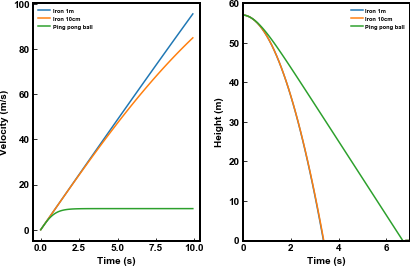

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def m(r): # returns weight of the ball with diameter r
    return 7.87*1e-3 * 4./3 * np.pi * r**3 # pi is explained by np.pi

# acceleration
ce = 1./2*0.47*1.025*np.pi
def a(r, v, m): 
    a = 9.8 - ce*(r**2)*(v**2)/m
    return a

# calculation of velocity
tstep = 0.1
t = np.arange(0, 10, 0.1) # time points from 0 s to 10 s by 0.1 s step
v = np.zeros((len(t), 3)) # column 1: r=0.5m ball, column 2: r=5cm ball, 3: ping pong ball
m1 = m(50)
m2 = m(5)
m3 = 0.0027
for i in range(1,len(t)):
    v[i] = v[i-1] + np.asarray([a(0.5, v[i-1,0], m1), a(0.05, v[i-1,1], m2), a(0.02, v[i-1,2], m3)])*tstep

# calculation of height
hinit = 57
h = np.zeros((len(t), 3)) # height
h[0] = np.asarray([hinit, hinit, hinit])
i = 1
while any([x>0 for x in h[i-1]]): # condition "any elements in the array are >0"
    h[i] = h[i-1] - v[i]*tstep
    i = i + 1
# detect when the balls hit the ground
ballname = {0: "Iron 1m", 1: "Iron 10cm", 2: "Ping pong ball"}
for i in range(3):
    print(f"Ball {ballname[i]} hits the ground at t = {t[np.argmin([x for x in h[:,i] if x > 0])]}.")

# plotting
fig,axs = plt.subplots(1,2)
axs[0].plot(t, v[:,0], label="Iron 1m")
axs[0].plot(t, v[:,1], label="Iron 10cm")
axs[0].plot(t, v[:,2], label="Ping pong ball")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Velocity (m/s)")
axs[0].legend()
axs[1].plot(t, h[:,0], label="Iron 1m")
axs[1].plot(t, h[:,1], label="Iron 10cm")
axs[1].plot(t, h[:,2], label="Ping pong ball")
axs[1].set_ylim((0,60))
axs[1].set_xlim((0,7))
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Height (m)")
axs[1].legend()
plt.show()

This does not show the difference of Iron 1m and Iron 10cm for the result. Let's change the `tstep`; `tstep` is 5 ms when t=0-3.5, 100 ms when t=3.5-7

Iron 1m hits the ground at t = 3.4050000000000002.
Iron 10cm hits the ground at t = 3.42.
Ping pong ball hits the ground at t = 6.700000000000003.


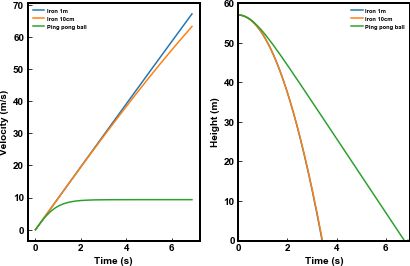

In [10]:
t = np.concatenate((np.arange(0, 3.5, 0.005), np.arange(3.5, 7, 0.1)), axis=0)
v = np.zeros((len(t), 3)) # column 1: r=0.5m ball, column 2: r=5cm ball, 3: ping pong ball
ballname = {0: "Iron 1m", 1: "Iron 10cm", 2: "Ping pong ball"}

# velocity
for i in range(1,len(t)):
    v[i] = v[i-1] + np.asarray([a(0.5, v[i-1,0], m1), a(0.05, v[i-1,1], m2), a(0.02, v[i-1,2], m3)])*(t[i]-t[i-1])
 # note that tstep is variable now

# height
hinit = 57
h = np.zeros((len(t), 3)) # height
h[0] = np.asarray([hinit, hinit, hinit])
i = 1
while any([x>0 for x in h[i-1]]): # condition "any elements in the array are >0"
    h[i] = h[i-1] - v[i]*(t[i]-t[i-1])
    i = i + 1
# detect when the balls hit the ground
for i in range(3):
    print(f"{ballname[i]} hits the ground at t = {t[np.argmin([x for x in h[:,i] if x > 0])]}.")

fig,axs = plt.subplots(1,2)
for i in range(3):
    axs[0].plot(t, v[:,i], label=ballname[i])
    axs[1].plot(t, h[:,i], label=ballname[i])
for i in range(2):
    axs[i].set_xlabel("Time (s)")
    axs[i].legend()
axs[0].set_ylabel("Velocity (m/s)")
axs[1].set_ylim((0,60))
axs[1].set_xlim((0,7))
axs[1].set_ylabel("Height (m)")
plt.show()